<a href="https://colab.research.google.com/github/FelipeRFN/7_Days_Of_Code_Data_Science/blob/main/7_days_of_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Dia 01


<h3> Tratamento dos dados
<br>
O processo de tratamento será feito pelo Python utilizando a biblioteca Pandas. Irei primeiramente tratar valores nulos e retirar valores que acredito não terem tanta relevância para prestação de contas, para que a planilha possa ficar mais leve e mais fácil de ser utilizada.

Abaixo foi importada a biblioteca que será trabalhada e feito a leitura e armazenamento dos dados em uma variável chamada dados


In [88]:
import pandas as pd
dados = pd.read_csv('despesa_ceaps_2022.csv', sep = ';', encoding = 'latin-1', header = 1)

Foi realizado então o primeiro tratamento removendo algumas colunas 'Dispensáveis' a primeira vista, como por exemplo a coluna Ano e Mes, visto que a tabela já possui um campo data.
<br>
Também foram passadas as alterações para a variável df, mantendo assim um backup sem alterações da tabela na variável dados

In [89]:
df = dados.drop(columns=['ANO'], inplace = False)
df.drop(columns=['MES'], inplace = True)
df.head()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617


Verificados quais colunas possuem valores nulos e quantos são.

In [90]:
df.isnull().sum()

,0
SENADOR,0
TIPO_DESPESA,0
CNPJ_CPF,0
FORNECEDOR,0
DOCUMENTO,934
DATA,0
DETALHAMENTO,7743
VALOR_REEMBOLSADO,0
COD_DOCUMENTO,0


Verificado também o tipo de dados que estão armazenados na tabela.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16805 entries, 0 to 16804
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SENADOR            16805 non-null  object
 1   TIPO_DESPESA       16805 non-null  object
 2   CNPJ_CPF           16805 non-null  object
 3   FORNECEDOR         16805 non-null  object
 4   DOCUMENTO          15871 non-null  object
 5   DATA               16805 non-null  object
 6   DETALHAMENTO       9062 non-null   object
 7   VALOR_REEMBOLSADO  16805 non-null  object
 8   COD_DOCUMENTO      16805 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


Abaixo foi realizado o tratamento de alguns dados, substituindo os valores nulo pelo texto "Não informado", mostrando que não foram especificadas as informações. Além disso foram alteados os valores da data e do valor reembolsado, anteriormente sendo salvos como strings, agora estão sendo tratados como datas e valores numéricos respectivamente.

In [92]:
df.fillna('Não informado', inplace = True)
df['DATA'] = pd.to_datetime(df['DATA'], format = '%d/%m/%Y')
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(',', '.').astype(float)

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16805 entries, 0 to 16804
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SENADOR            16805 non-null  object        
 1   TIPO_DESPESA       16805 non-null  object        
 2   CNPJ_CPF           16805 non-null  object        
 3   FORNECEDOR         16805 non-null  object        
 4   DOCUMENTO          16805 non-null  object        
 5   DATA               16805 non-null  datetime64[ns]
 6   DETALHAMENTO       16805 non-null  object        
 7   VALOR_REEMBOLSADO  16805 non-null  float64       
 8   COD_DOCUMENTO      16805 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB


,0
SENADOR,0
TIPO_DESPESA,0
CNPJ_CPF,0
FORNECEDOR,0
DOCUMENTO,0
DATA,0
DETALHAMENTO,0
VALOR_REEMBOLSADO,0
COD_DOCUMENTO,0


In [93]:
df.tail()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
16800,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WIXHAI,2022-12-06,"Companhia Aérea: LATAM, Localizador: WIXHAI. P...",2893.04,2191398
16801,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WITOLM,2022-12-09,"Companhia Aérea: GOL, Localizador: WITOLM. Pas...",1180.19,2192272
16802,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,THPKVQ,2022-12-20,"Companhia Aérea: TAM, Localizador: THPKVQ. Pas...",2671.90,2192274
16803,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QNN9HX,2022-12-21,"Companhia Aérea: AZUL, Localizador: QNN9HX. Pa...",1334.31,2192244
16804,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WMQWBX,2022-12-30,"Companhia Aérea: TAM, Localizador: WMQWBX. Pas...",2250.72,2193622


In [94]:
# Criando uma nova coluna 'DATA_2022' com o ano 2022
df['DATA_2022'] = pd.to_datetime({'year': 2022, 'month': df['DATA'].dt.month, 'day': df['DATA'].dt.day})

# Substituindo a coluna original pela nova coluna
df['DATA'] = df['DATA_2022']

# Removendo a coluna temporária (opcional)
df = df.drop('DATA_2022', axis=1)

df['DATA']

,DATA
0,2022-01-03
1,2022-01-04
2,2022-01-14
3,2022-01-18
4,2022-01-17
...,...
16800,2022-12-06
16801,2022-12-09
16802,2022-12-20
16803,2022-12-21


<h1> Dia 02


<h3> O desafio proposto no 2º dia é realizar um Storytelling com as informações do dataframe. Permanecerei com as consultas utiliznado a biblioteca Pandas porém serão gerados gráficos para que as informações também fiquem representadas visualmente.


Abaixo foram organizados os todos os Senadores em ordem decrescente, mostrando qual senador teve o maior gasto e qual obteve o menor gasto de uma maneira geral.

<Axes: xlabel='SENADOR'>

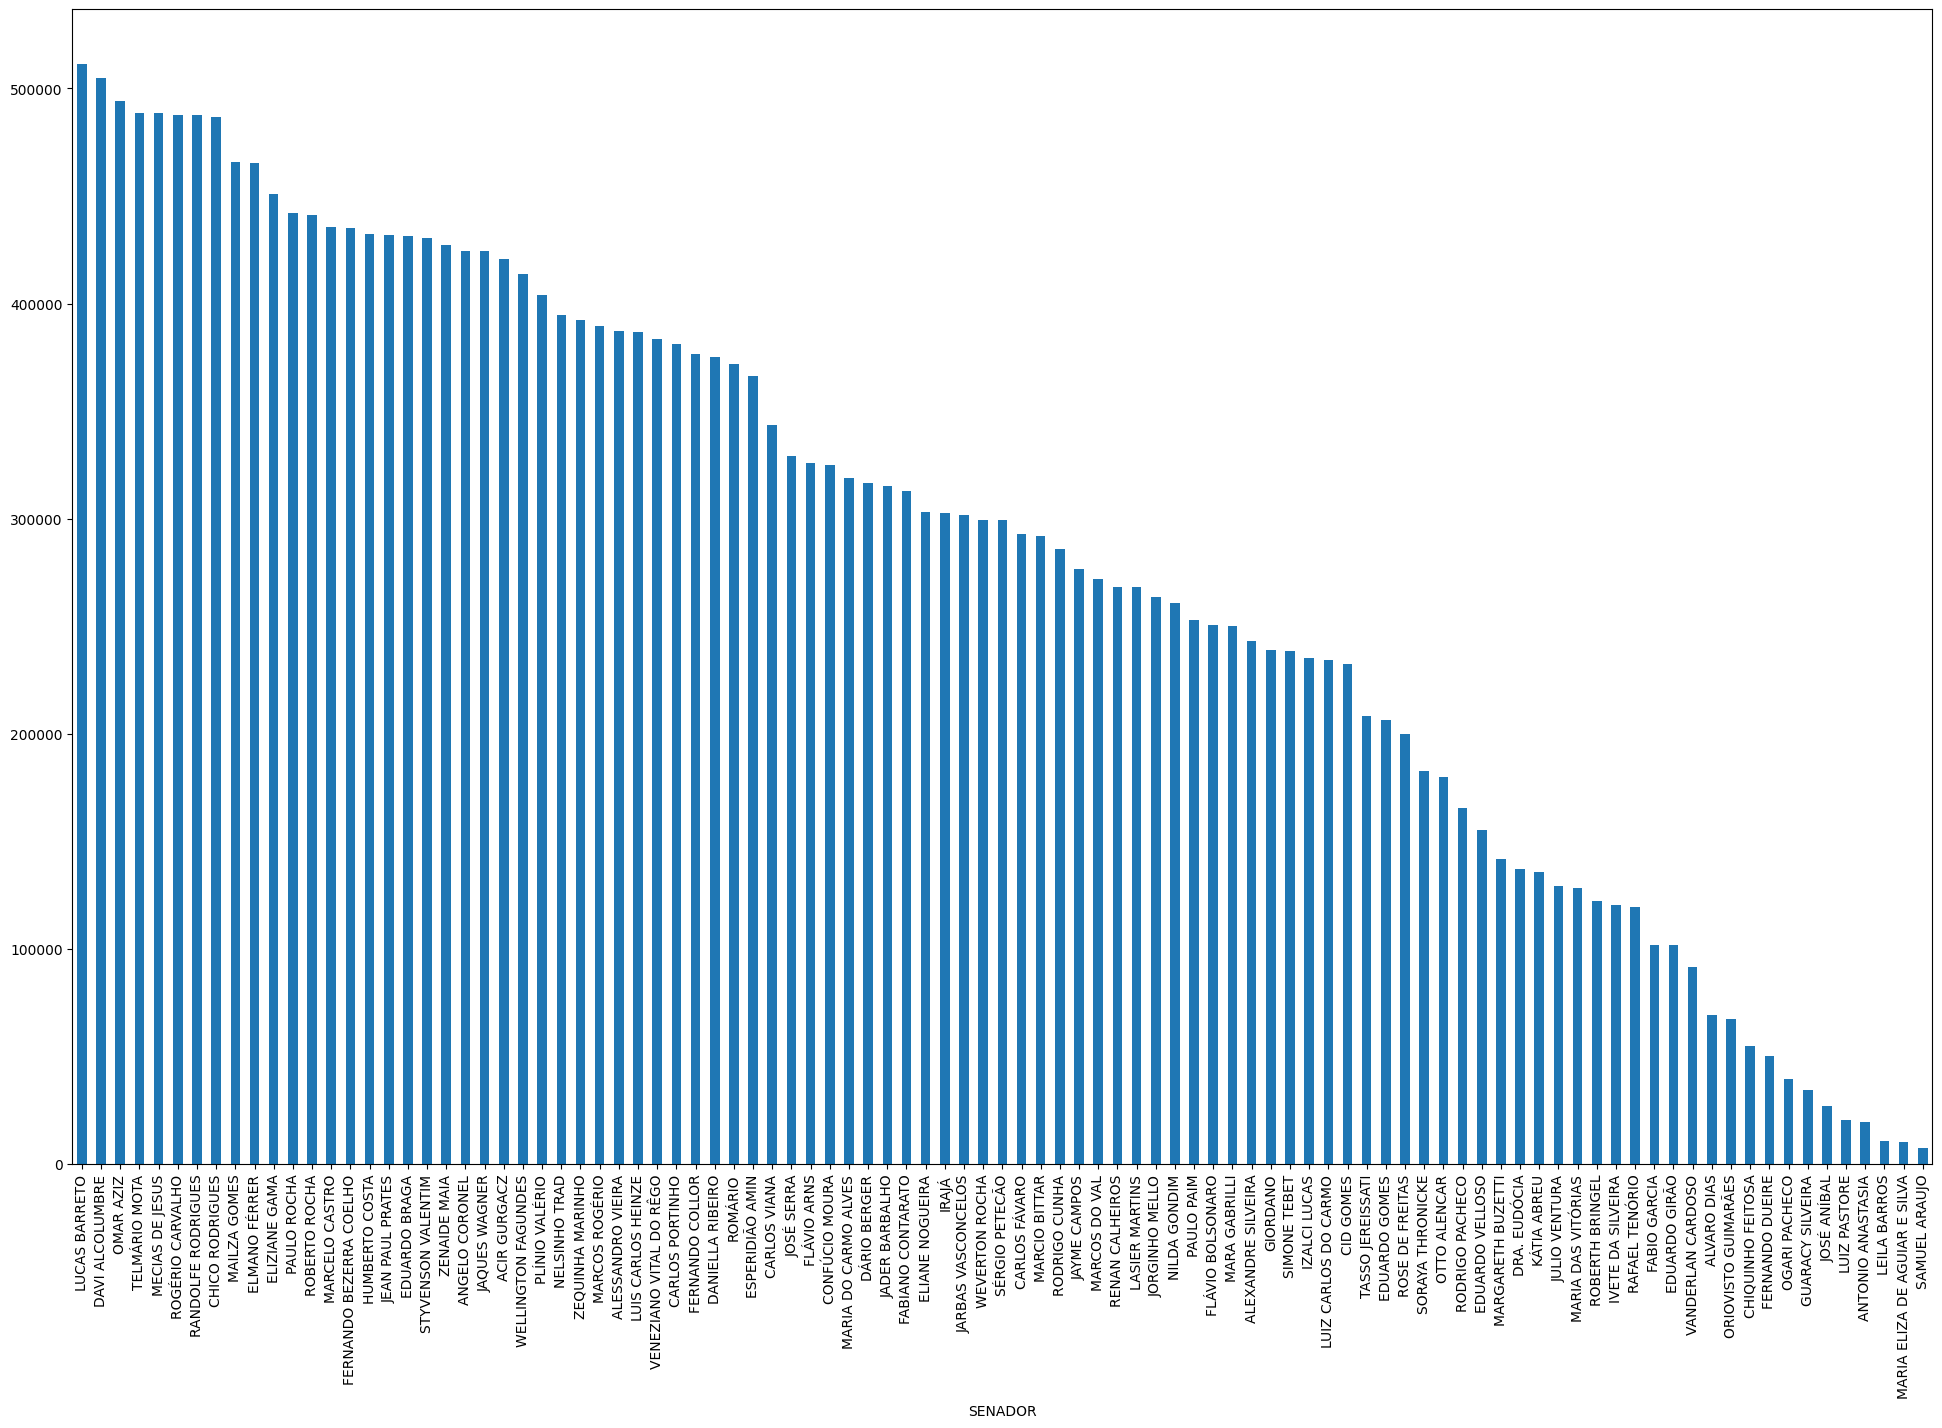

In [95]:
gastos_por_senador = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
gastos_por_senador.plot(kind = 'bar', figsize = (24,15))

Abaixo foram feitas as mesmas consultas porém resumindo os 10 senadores que tiveram maiores gastos no geral.

<Axes: xlabel='SENADOR'>

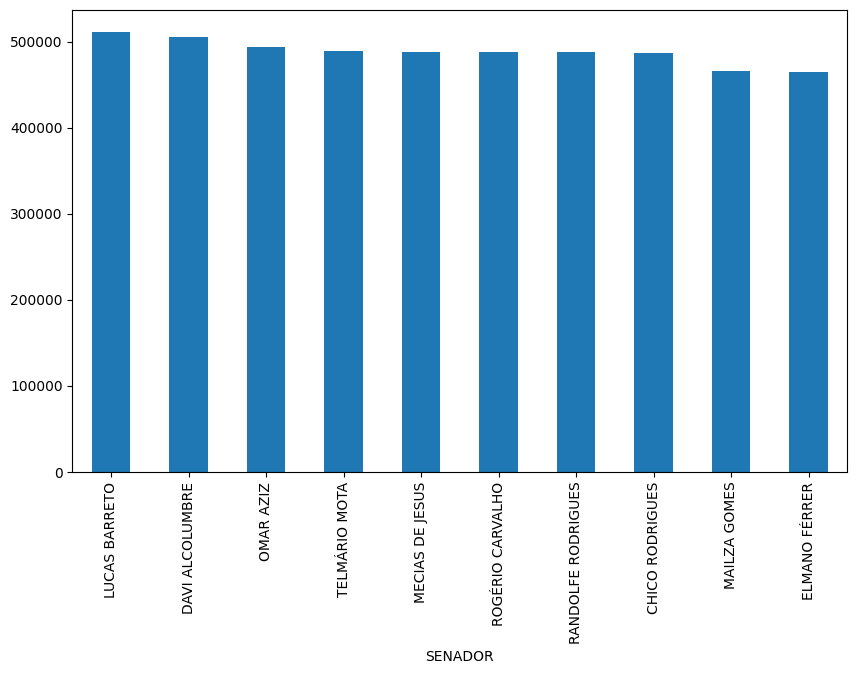

In [96]:
senadores_que_mais_gastaram = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
senadores_que_mais_gastaram.plot(kind = 'bar', figsize = (10,6))

E então os 10 senadores com menores gastos no ano organizados em ordem crescente

<Axes: xlabel='SENADOR'>

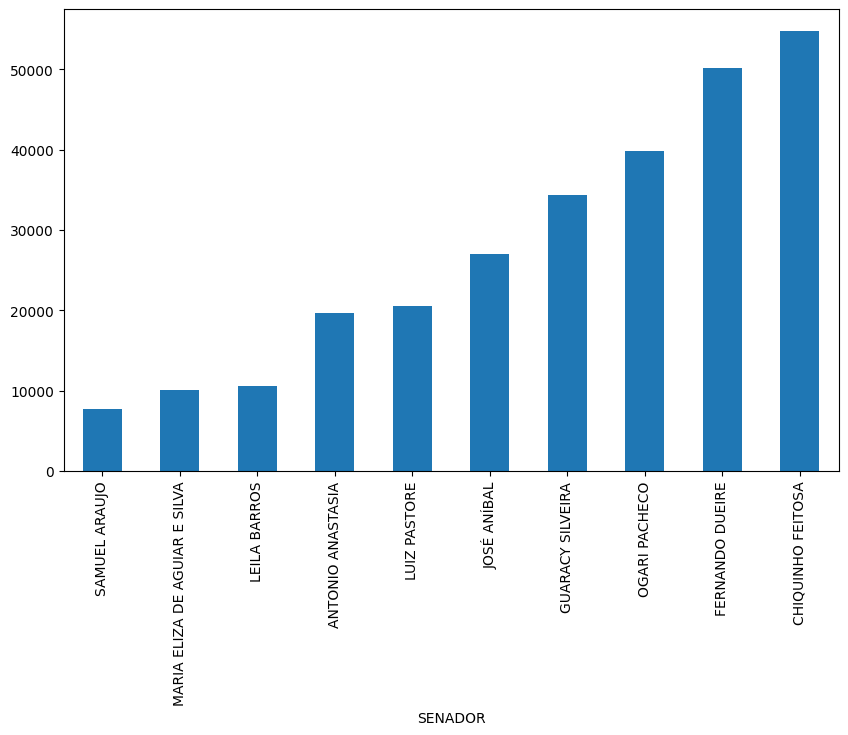

In [97]:
senadores_que_menos_gastaram = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=True).head(10)
senadores_que_menos_gastaram.plot(kind = 'bar', figsize = (10,6))

Em seguida foi feito o levantamento de quantas vezes cada Senador realizou determinado gasto, para que se possa ter uma ideia de quais recusos são utilizados com mais frequência pelos senadores.

In [98]:
qtd_despesas_por_senador = df.groupby(['SENADOR', 'TIPO_DESPESA']).size()
qtd_despesas_por_senador

SENADOR           TIPO_DESPESA                                                                                                                                                                                   
ACIR GURGACZ      Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            12
                  Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                               2
                  Divulgação da atividade parlamentar                                                                                                                                                                 23
                  Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                    27
                  Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  56
                                                                                                                                                                                                                    ... 
ZEQUINHA MARINHO  Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      17
                  Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                               5
                  Divulgação da atividade parlamentar                                                                                                                                                                  1
                  Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   170
                  Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  93
Length: 449, dtype: int64

E então temos a quantidade de gastos total de todos os senadores ao decorrer do ano, onde é possível observar os períodos onde mais ocorrem gastos.

<Axes: xlabel='DATA'>

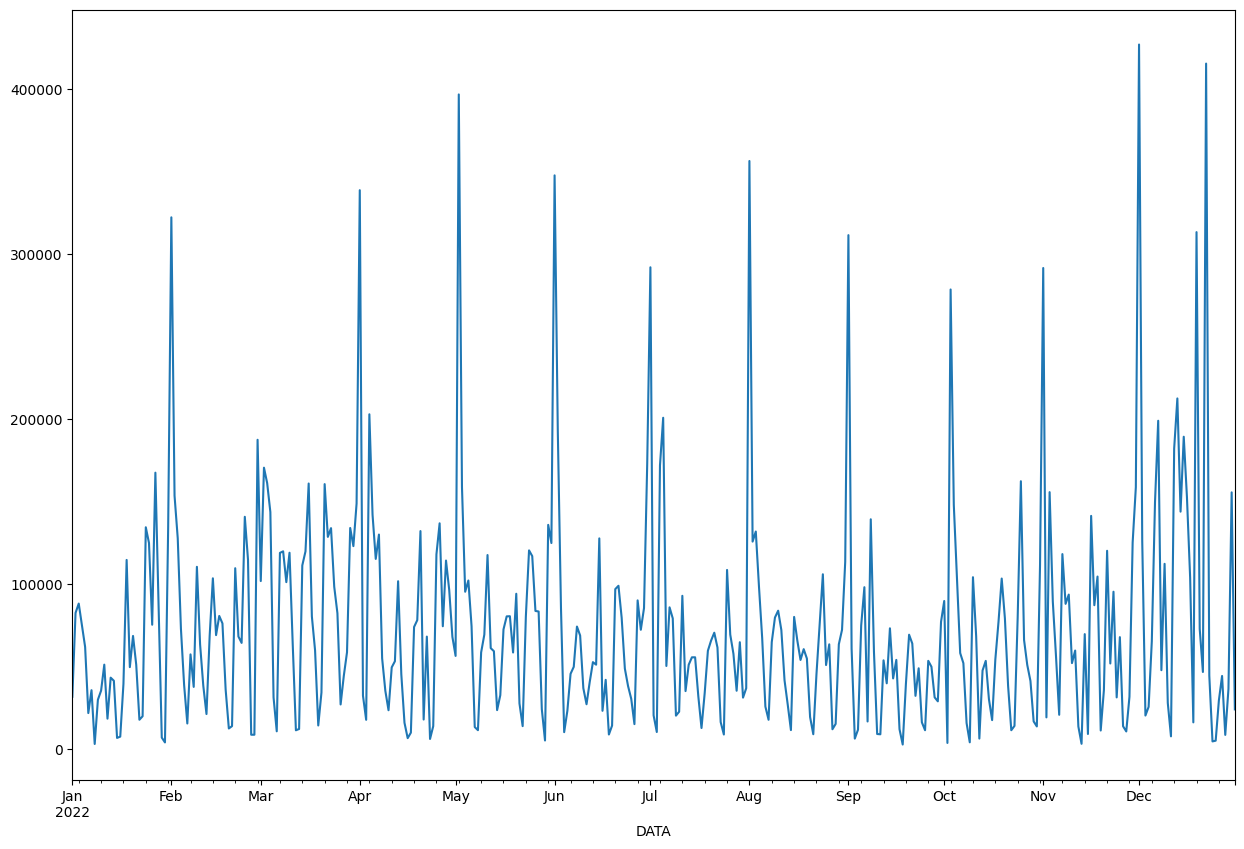

In [101]:
data_gastos = df.groupby('DATA')['VALOR_REEMBOLSADO'].sum()
data_gastos.plot(kind = 'line', figsize = (15,10))